<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/time-series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-series forecasting: Apple stock prediction


In [44]:
!pip install yfinance --quiet

In [56]:
import yfinance as yf
import pandas as pd
# getting data from Yahoo Finance
stock_name = 'AAPL'
data = yf.download(stock_name, start="2019-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


In [57]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.667183,37.889009,36.787041,36.944466,148158800
2019-01-03,33.915249,34.757226,33.869929,34.342199,365248800
2019-01-04,35.363068,35.432241,34.299268,34.473387,234428400
2019-01-07,35.284367,35.499037,34.800170,35.468029,219111200
2019-01-08,35.956993,36.212212,35.425093,35.673153,164101200


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1510 non-null   float64
 1   (High, AAPL)    1510 non-null   float64
 2   (Low, AAPL)     1510 non-null   float64
 3   (Open, AAPL)    1510 non-null   float64
 4   (Volume, AAPL)  1510 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [59]:
data['close price']=data['Close']
data.index=pd.to_datetime(data.index)


In [60]:
data.drop(columns=['Open','High','Close','Low','Volume'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2019-01-02 to 2024-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (close price, )  1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


In [50]:
data.head()

Price,close price
Ticker,
Date,
2019-01-02,20.674667
2019-01-03,20.024000
2019-01-04,21.179333
2019-01-07,22.330667
2019-01-08,22.356667


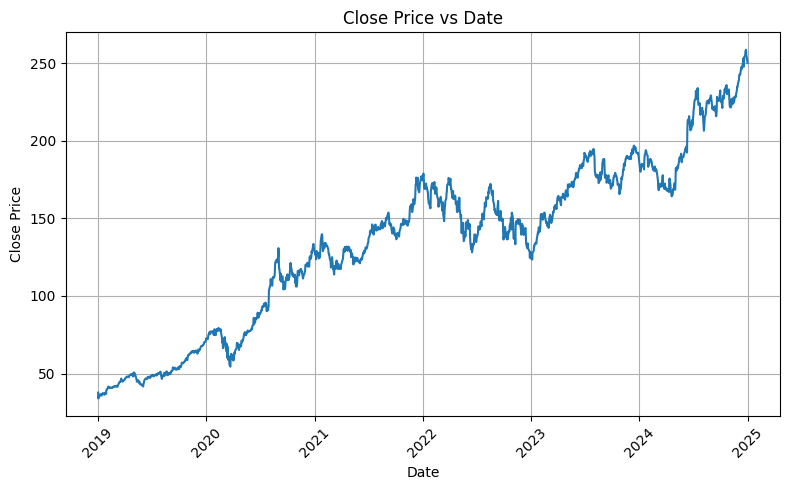

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['close price'])
plt.title('Close Price vs Date')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# creating lag features to be used for DNN and ensemble methods

In [ ]:
lags = [1, 7, 30, 365]  # Example: 1-day, 2-day, 5-day, 10-day lags

for lag in lags:
    data[f'Close_lag_{lag}'] = data['close price'].shift(lag)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.index, data['close price'], test_size=0.2, shuffle=False)
print("Training Dates:", X_train)
print("Testing Dates:", X_test)

Training Dates: DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-10-05', '2023-10-06', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
               '2023-10-17', '2023-10-18'],
              dtype='datetime64[ns]', name='Date', length=1208, freq=None)
Testing Dates: DatetimeIndex(['2023-10-19', '2023-10-20', '2023-10-23', '2023-10-24',
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=302, freq=None)


A lag is a time delay or offset in a time series, representing a past value of a variable used to predict its future values.
Example:
If you're forecasting sales, a lag of 1 might mean using last month's sales to predict this month's sales.
Purpose:
Lags help capture the relationships between past and future values of a variable, which can be crucial for accurate forecasting.

ARIMA, SARIMA, and Temporal Fusion Transformer (TFT) Models:

ARIMA (Autoregressive Integrated Moving Average):
A statistical model that uses past values of a time series (autoregressive), differencing to achieve stationarity (integrated), and past forecast errors (moving average) to predict future values.
Strengths: Can handle a wide range of time series patterns, including trends and seasonality.
Limitations: Assumes linear relationships and may struggle with complex patterns.

SARIMA (Seasonal ARIMA):
An extension of ARIMA that incorporates seasonal patterns in the data.
Strengths: Captures both non-seasonal and seasonal patterns in the data.
Limitations: Still assumes linear relationships and may struggle with complex patterns.

Temporal Fusion Transformer (TFT):
A deep learning model that uses self-attention mechanisms to capture complex temporal patterns across multiple time sequences.
Strengths: Can handle complex patterns, multi-horizon forecasting, and interpretability through attention mechanisms.
Limitations: Requires a large amount of data and can be computationally expensive

# is ARIMA, SARIMA valid for this dataset?

# LSTM

# facebook Prophet model

In [65]:
!pip install prophet --quiet

In [67]:
from prophet import Prophet
model = Prophet()
df_prophet = data.rename(columns={'date': 'ds', 'close price': 'y'})
# Fit the model with the historical data
model.fit(df_prophet)

TypeError: Prophet.fit() takes 2 positional arguments but 3 were given

In [ ]:

# Make future dataframe (predicting for the next 30 days)
future = model.make_future_dataframe(df_prophet, periods=30)

# Predict the future stock prices
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Stock Price Prediction using Facebook Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# XGBoost